# Register psychopy

In [ ]:
# Example: 
# !expipe process psychopy 1053-010319-5 --jsonpath c:\apps\expipe-projects\probe_v1\actions\1053-010319-5

# Analysis for probe experiments

#### Requirements:

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import visualstimulation as vs
import vian
import expipe
import matplotlib.pylab as plt
import numpy as np
import neo
import pickle as pkl
import os
import quantities as pq
import scipy.signal as ss
import quantities as pq

%matplotlib notebook

### Set project path, action-id, gets epochs and create spiketrains

In [4]:
# set project path
project_path = "C:\\apps\expipe-projects\probe_v1"
project = expipe.get_project(project_path)

#set action id
actions = project.actions
action_id = '1053-010319-10'
action = actions[action_id]

# look at all actions:
#actions

#get data path
data_path = vian.get_data_path(action)

Project path: C:\apps\expipe-projects\probe_v1
Data path: actions\1053-010319-10\data\main.exdir


In [5]:
# load epochs 
epochs = vian.load_epochs(data_path)

oe_epoch = epochs[0]
ps_epoch = epochs[1]

# Show epochs
#epochs

In [ ]:
# Create spiketrains
channel_idx = 0
sptr = vian.load_spiketrains(data_path, channel_idx)

# Print spikestrains
#for st in sptr:
#    print(st)

In [ ]:
# Save spiketrains locally
pkl_path = os.path.join('C:/apps/temp', action_id + '_sptr.pkl')
with open(pkl_path, 'wb') as outfile:
    pkl.dump(sptr, outfile)

In [6]:
#Get spiketrains already saved locally
channel_idx = 0
pkl_path = os.path.join('C:/apps/temp', action_id + '_sptr.pkl')
with open(pkl_path, 'rb') as infile:
    sptr = pkl.load(infile)

### Plotting spiketrains

<IPython.core.display.Javascript object>


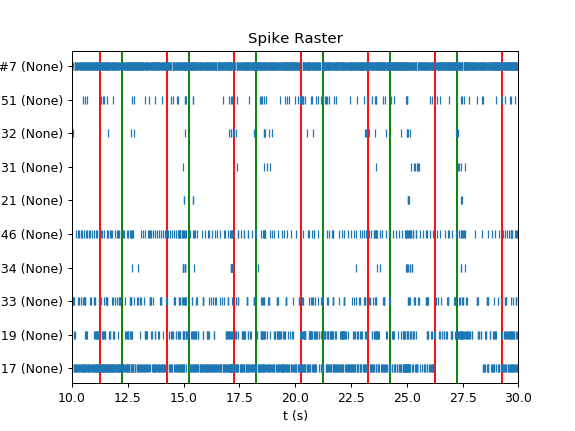

In [7]:
# Plot all spiketrains for a session for time= T=[start.,end.]):
#fig, ax = plt.subplots(1,1)
#vian.spike_raster(ax, sptr, T=[0., 170.], )

# Plot all spiketrains for entire session:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#for i, st in enumerate(sptr):
    #ax.plot(st.times, i * np.ones(len(st)), '|', ls='')

# Plot spiketrains with epochs for a given time interval T=[start, stop]
fig, ax = plt.subplots(1,1)
vian.spike_raster(ax, sptr, T=[10., 30.], epochs=epochs)

<IPython.core.display.Javascript object>


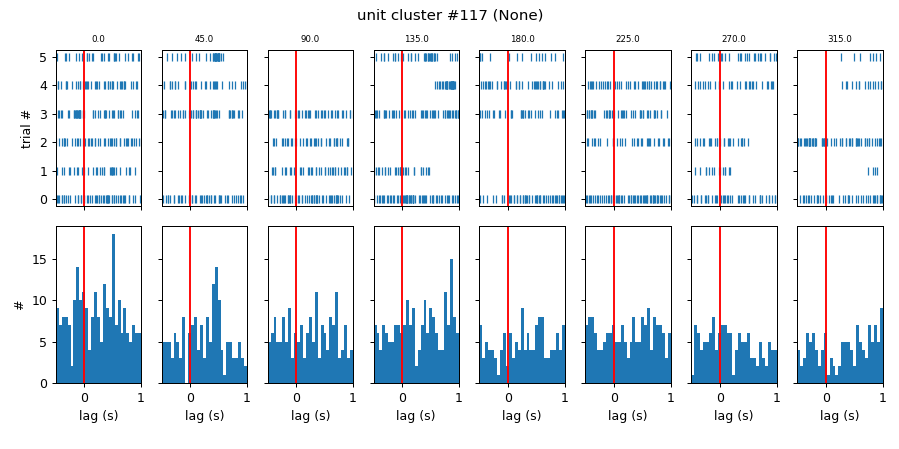

<IPython.core.display.Javascript object>


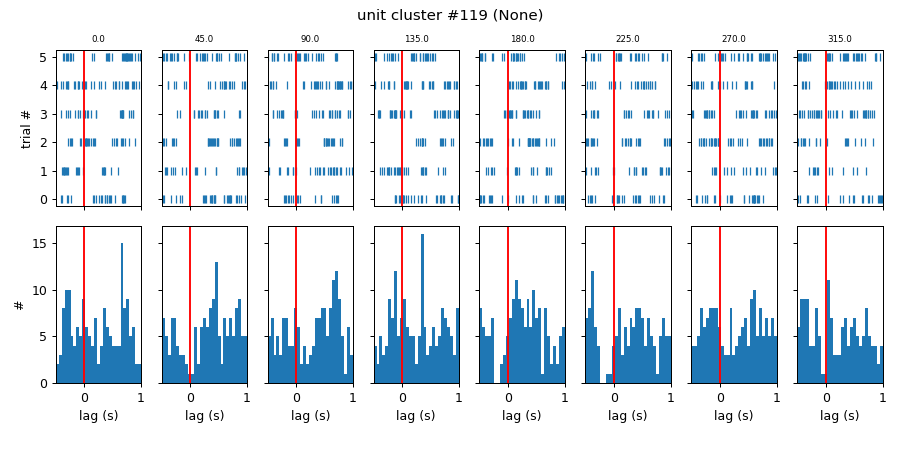

<IPython.core.display.Javascript object>


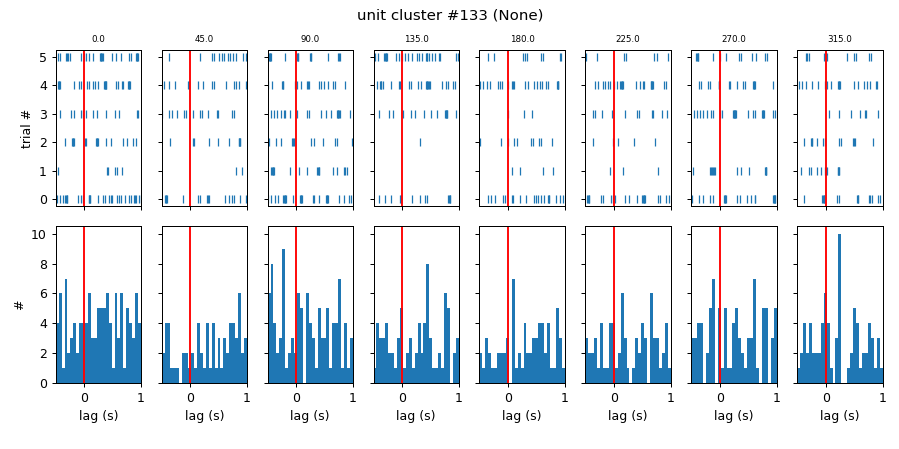

<IPython.core.display.Javascript object>


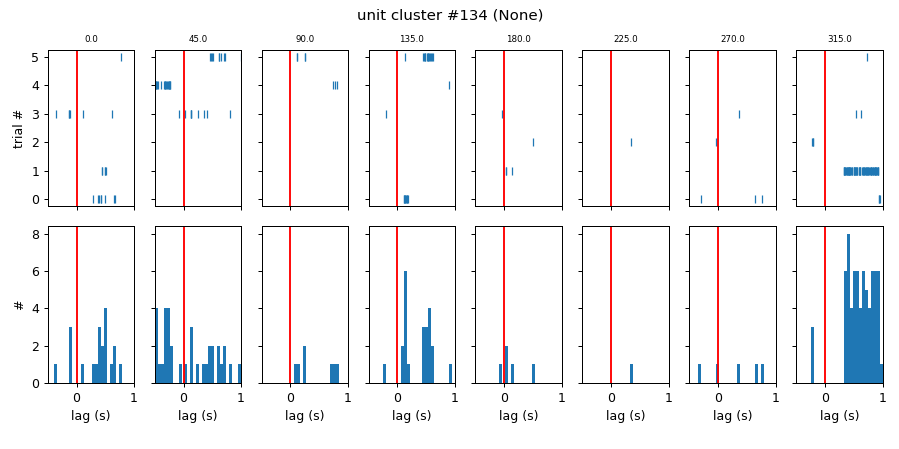

<IPython.core.display.Javascript object>


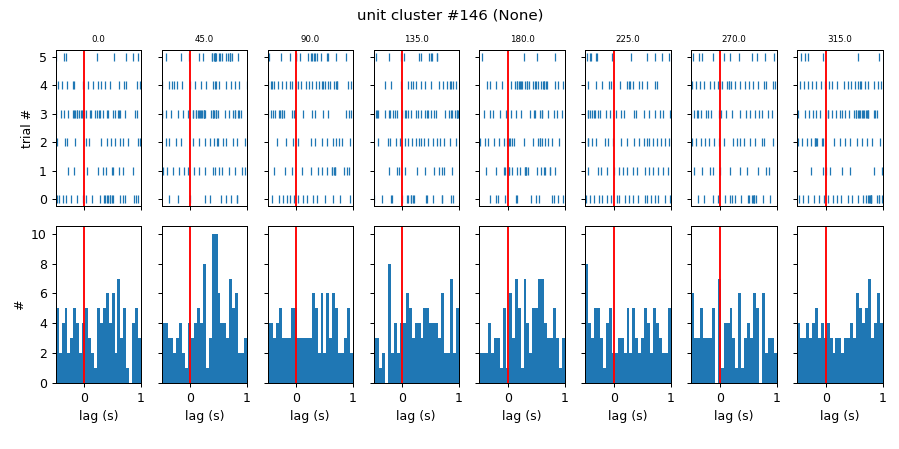

<IPython.core.display.Javascript object>


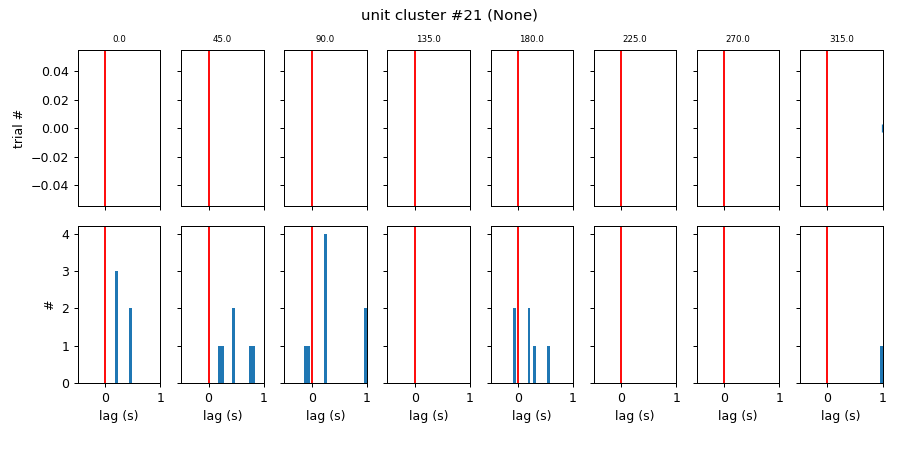

<IPython.core.display.Javascript object>


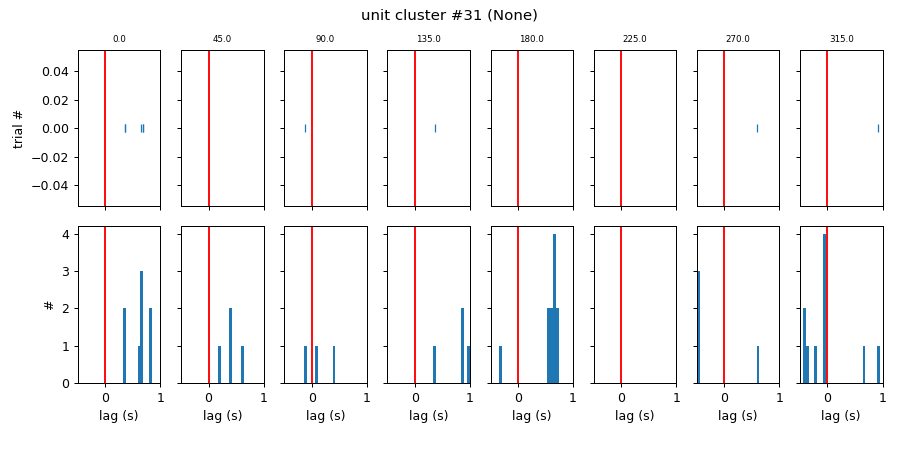

<IPython.core.display.Javascript object>


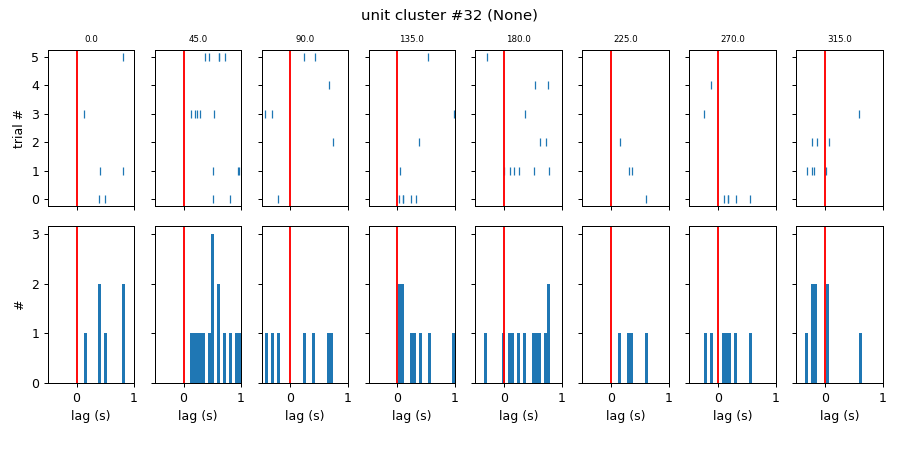

<IPython.core.display.Javascript object>


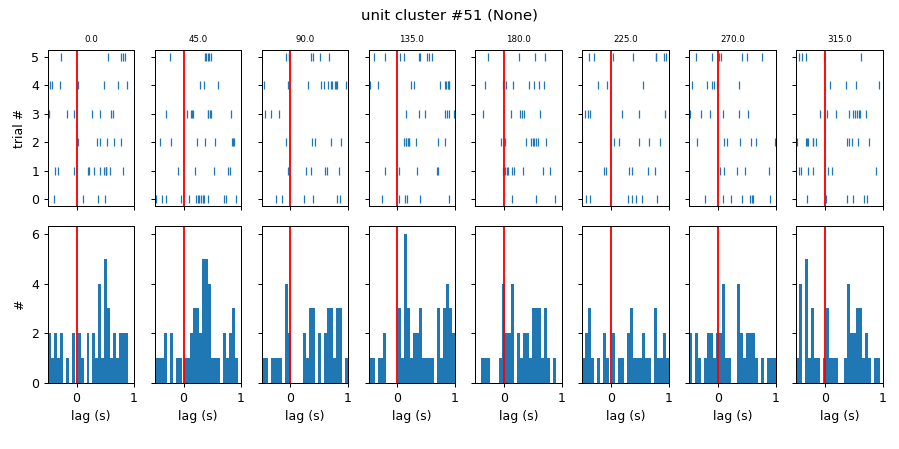

<IPython.core.display.Javascript object>


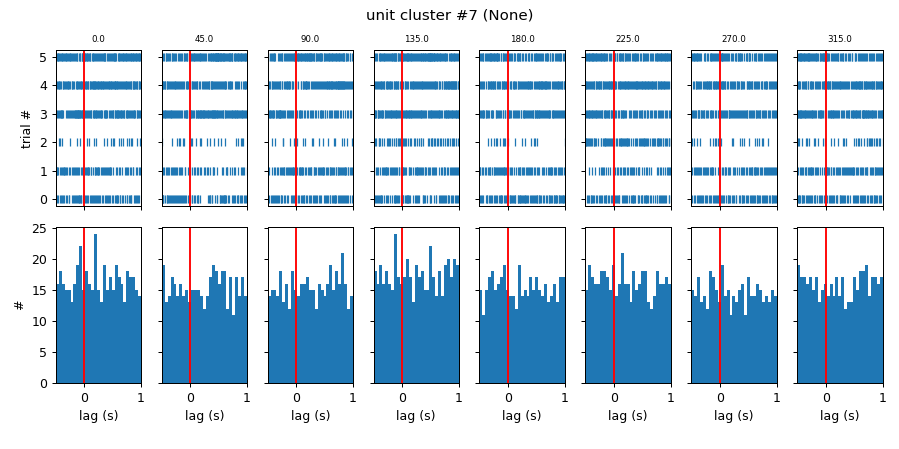

In [8]:
# Plot raster plots and psth for different orientations. One unit:
#vian.plot_psth(sptr[1], ps_epoch, lags=(-0.5*pq.s, 1*pq.s), bin_size=0.01*pq.s, n_trials=np.inf)

# Plot raster plots and psth for different orientations. All units:
for sp in sptr:
    vian.plot_psth(sp, ps_epoch, lags=(-0.5*pq.s, 1*pq.s), bin_size=0.05*pq.s, n_trials=np.inf)

### Plotting Waveforms:

In [10]:
fig, axes = plt.subplot(1, len(sptr,) sharey=True)
for i, (ax)

SyntaxError: invalid syntax (<ipython-input-10-62c6a120ed88>, line 1)

In [11]:
for i, w in enumerate()
wf = sptr[0].waveforms
print(wf.shape)

SyntaxError: invalid syntax (<ipython-input-11-d0025de3b1ed>, line 1)

In [ ]:
wf_mean = np.mean(wf, axis=0)
print(wf_mean.shape)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, w in enumerate(wf_mean):
    _ = ax.plot(w + i*25, 'k')

In [ ]:
    plt.figure()
_ = plt.plot(wf_mean.T)

In [ ]:
wf = sptr[0].waveforms
print(wf.shape)


if load_waveforms:
    vlimround=2**6
    fig, axes = plt.subplots(1, len(spiketrains), sharey=True)
    for i, (ax, spiketrain) in enumerate(zip(axes, spiketrains)):
        mean = spiketrain.waveforms.mean(axis=0)
        std = spiketrain.waveforms.std(axis=0)
        draw_lineplot(ax, mean, dt=1./30, T=(-0.5, 1.5), vlimround=vlimround, unit=mean.dimensionality)
        draw_lineplot(ax, mean+std*2, dt=1./30, T=(-.5, 1.5), vlimround=vlimround, scalebar=False, color='0.5')
        draw_lineplot(ax, mean-std*2, dt=1./30, T=(-.5, 1.5), vlimround=vlimround, scalebar=False, color='0.5')
        ax.set_title('#{}'.format(spiketrain.name))
        if i != 0:
            plt.setp(ax.get_yticklabels(), visible=False)

In [ ]:
#plt.rcParams.update(**plt.rcParamsDefault)
#plt.rcParams.update({
    #'figure.dpi' : 150,
 #   'figure.figsize' : [6.4*1.5, 4.8*1.5],
#})

In [ ]:
load_waveforms = True
if load_waveforms:
    vlimround=2**6
    fig, axes = plt.subplots(1, len(sptr), sharey=True)
    for i, (ax, spiketrain) in enumerate(zip(axes, sptr)):
        mean = spiketrain.waveforms.mean(axis=0)
        std = spiketrain.waveforms.std(axis=0)
        draw_lineplot(ax, mean, dt=1./30, T=(-0.5, 1.5), vlimround=vlimround, unit=mean.dimensionality)
        draw_lineplot(ax, mean+std*2, dt=1./30, T=(-.5, 1.5), vlimround=vlimround, scalebar=False, color='0.5')
        draw_lineplot(ax, mean-std*2, dt=1./30, T=(-.5, 1.5), vlimround=vlimround, scalebar=False, color='0.5')
        ax.set_title('#{}'.format(spiketrain.name))
        if i != 0:
            plt.setp(ax.get_yticklabels(), visible=False)

 